# Data Science Capstone Project - Car Accident Severity
### *Yoona Song* ###

## Introduction / Business Problem

### *Objective*

This project will explore severity of car accidents in Seattle from 2004 to present. First, I will identify key attributes that would most likely to cause collisions. Then, I will develop a model that can predict accident severity based on the key attributes identified.

### *Target audience*

This model will help Seattle residents be informed on what type of attributes would most likely to result in collisions.

## Data

I will use a sample data set "Collisions-All Years". 
In order to test the severity of collisions, I will use 6 attributes: WEATHER, ROADCOND, LIGHTCOND, SPEEDING, UNDERINFL, INATTENTIONIND.

- WEATHER: a description of the weather conditions during the time of the collision
- ROADCOND: the condition of the road during the collision
- LIGHTCOND: the light conditions during the collision
- SPEEDING: whether or not speeding was a factor in the collision
- UNDERINFL: whether or not collision was due to inattention
- INATTENTIONIND: Whether or not collision was due to inattention

*Data source: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd

import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-29 12:45:34--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  44.6MB/s   in 1.6s   

2020-09-29 12:45:36 (44.6 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df=pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### *Clearing the data* 

In [5]:
import pandas as pd
import numpy as np

df.fillna(0)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,0,0.0,0,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,0.0,...,Wet,Dark - Street Lights On,0,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,0.0,...,Dry,Daylight,0,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,0.0,...,Dry,Daylight,0,0.0,0,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,0,4028032.0,0,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,0,0.0,0,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,0,8344002.0,0,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,0,0.0,0,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,0.0,...,Dry,Daylight,0,6166014.0,0,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,0,6079001.0,0,10,Entering at angle,0,0,N


In [7]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [8]:
df['SPEEDING'].replace(np.nan, "N", inplace=True) ##Replace 0 value to "N"

df['SPEEDING'].value_counts() # "N" value appears

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [9]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [10]:
df['INATTENTIONIND'].replace(np.nan, "N", inplace=True) #Replace 0 value to "N"

df['INATTENTIONIND'].value_counts() # "N" value appears

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [11]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [12]:
# Replace "1" -> "Y", "0" -> "N"
df['UNDERINFL'].replace("1", "Y", inplace=True) 
df['UNDERINFL'].replace("0", "N", inplace=True)

df['UNDERINFL'].value_counts()

N    180668
Y      9121
Name: UNDERINFL, dtype: int64

# Methodology

In [15]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


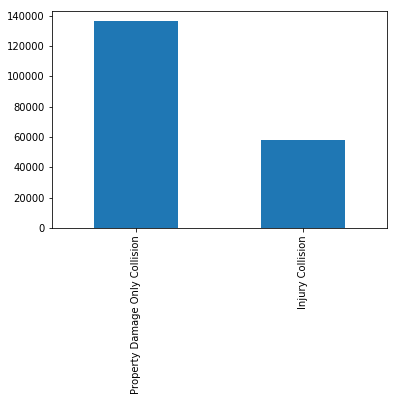

In [16]:
df['SEVERITYDESC'].value_counts().plot(kind='bar')

In [17]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


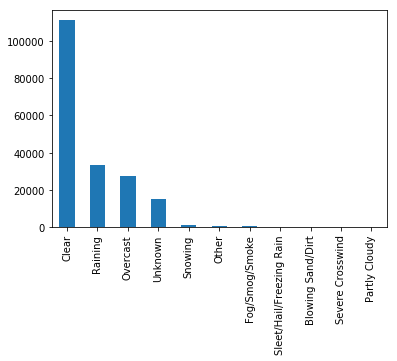

In [18]:
df['WEATHER'].value_counts().plot(kind='bar')

In [19]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


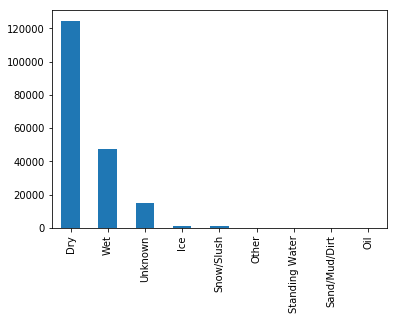

In [20]:
df['ROADCOND'].value_counts().plot(kind='bar')

In [21]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


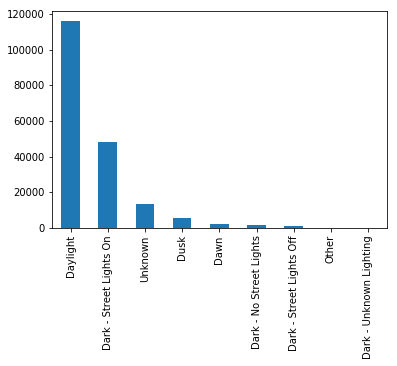

In [22]:
df['LIGHTCOND'].value_counts().plot(kind='bar')

In [23]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
N,185340
Y,9333


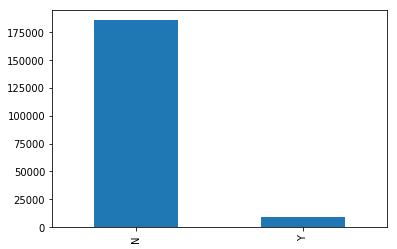

In [24]:
df['SPEEDING'].value_counts().plot(kind='bar')

In [25]:
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,180668
Y,9121


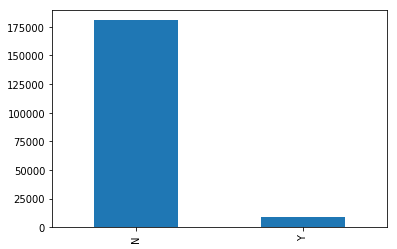

In [26]:
df['UNDERINFL'].value_counts().plot(kind='bar')

In [27]:
df['INATTENTIONIND'].value_counts().to_frame()

,INATTENTIONIND
N,164868
Y,29805


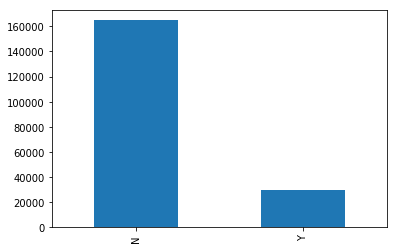

In [28]:
df['INATTENTIONIND'].value_counts().plot(kind='bar')

# Results / Discussion

Among all collisions recorded by Traffic Records in Seattle, a number of 'Property Damage Only Collision' was more than twice of 'Injury Collision'. This result was shown through the bar graph of 'SEVERITYDESC' attribute. 

Before graphing the data, I cleared the data under the column of 'SPEEDING,'UNDERINFL' and 'INATTENTIONIND' which did not have consistent value types. Using six attributes - WEATHER, ROADCOND, LIGHTCOND, SPEEDING, UNDERINFL, INATTENTIONIND, I visualized the data through bar graphs.  

I created bar graphs of WEATHER, ROADCOND and LIGHTCOND collumns. It was found that the highest rate of collisions in Seattle occured under the conditions of 'Clear' weather, 'Dry' road and 'Daylight'.

The attributes of SPEEDING, UNDERINFL and INATTENTIONIND data were recorded with Y or N answer. While speeding, drugs and inattention were not major factors to cause collisions in Seattle, there were still quite a number of collisions caused by speeding, drugs and inattention.

# Conclusion

According to the results shown above, the highest rate of collissions in Seattle happened in a clear weather with dry road and daylight conditions. Considering that most of the time, the roads are usually dry and more cars are on the road during the daytime, this result is reasonable. Moreover, it was found that speeding, inattention and drugs or alcohol still cause a significant number of collisions. Drivers are advised to drive under speed limit and be alert and sober when driving.